# Escalamiento de datos

## Librerias

**Starter Pack**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Utils**

In [2]:
import timeit

**Modelos/Datos**

In [3]:
from sklearn import datasets, linear_model

### Datos Númericos

In [4]:
data = datasets.load_diabetes()

In [5]:
X, y = datasets.load_diabetes(return_X_y=True) 

In [6]:
names = data.feature_names

In [18]:
df = pd.DataFrame(data['data'])
df.columns = names

In [7]:
df_X = pd.DataFrame(X)
df_X.columns=names

In [8]:
raw = X[:, None, 2]

#### **Transformaciones Lineales**

**Escalamiento Linear**: 
<ul>
    <li>
        <strong>¿Por qué usarlos?</strong> 
        <p>Algunos modelos de Machine Learning son más eficientes en el rango [-1, 1]</p>
    </li>
    <li>
        <strong>Hay diferentes tipos</strong> 
        <p>max-min, Z-Score, Clipping, Winsorizing, etc.</p>
    </li>
    <li>
        <strong>¿Cuándo usarlos?</strong> 
        <p>Cuando la data es simétrica o esta uniformemente distribuida</p>        
    </li>
</ul>

**Máximo-Minimo**

In [9]:
max_raw = raw.max()
min_raw = raw.min()

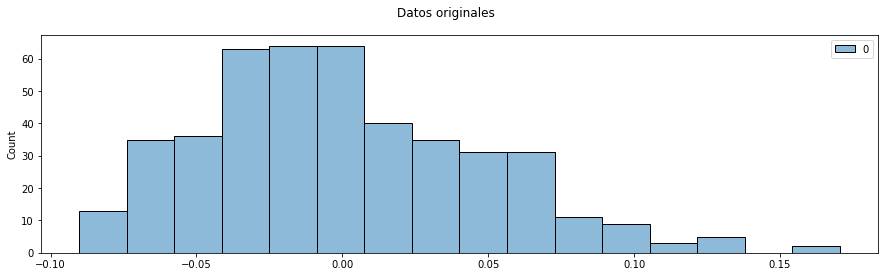

In [10]:
plt.figure(figsize=(15,4))
plt.suptitle('Datos originales')
sns.histplot(raw)
plt.show()

**Escalamiento**

In [24]:
def min_max_escaler(x, min, max):
    return ((2*(x)-min-max)/(max-min))

In [ ]:
min_max_escaler(0, min_raw, max_raw)

-0.3077857970906052

In [11]:
plt.figure(figsize=(15,4))
plt.suptitle('Datos escalonados')
sns.histplot(scaled)
plt.show()

NameError: name 'scaled' is not defined

<Figure size 1080x288 with 0 Axes>

**Gráficos combinados**

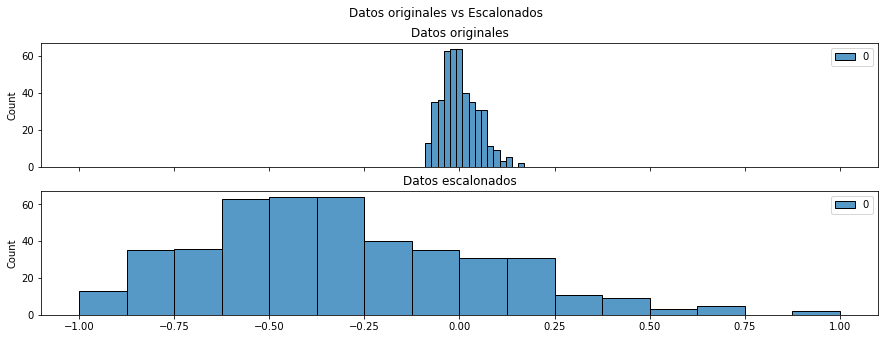

In [27]:
fig, ax = plt.subplots(2,1, figsize=(15,5), sharex=True)
fig.suptitle('Datos originales vs Escalonados')

sns.histplot(ax=ax[0], data=raw)
ax[0].set_title('Datos originales')

sns.histplot(ax=ax[1], data=scaled)
ax[1].set_title('Datos escalonados')
plt.show()

**Modelo**

In [39]:
def train_raw():
    linear_model.LinearRegression().fit(raw, y)

In [40]:
def train_scaled():
    linear_model.LinearRegression().fit(scaled, y)

In [41]:
raw_time = timeit.timeit(train_raw, number=100000)
scaled_time = timeit.timeit(train_scaled, number=100000)

**Comparamos los tiempos de cada modelo**

In [42]:
round(raw_time, 2), round(scaled_time, 2)

(65.17, 71.04)

#### **Transformaciones no lineales**

<ul>
    <li>
        <strong>¿Por qué usarlos?</strong> 
        <p>Lo usamos cuando nuestros datos estan fuertemente sesgados, no son simetricos.</p>
    </li>
    <li>
        <strong>Hay diferentes tipos</strong> 
        <p>Logaritmos, sigmoides, polinomiales, etc.</p>
    </li>
    <li>
        <strong>¿Cuándo usarlos?</strong> 
        <p>Antes de hacer escalamientos lineales</p>        
    </li>
</ul>

In [33]:
df = pd.read_csv('Data/cars.csv')

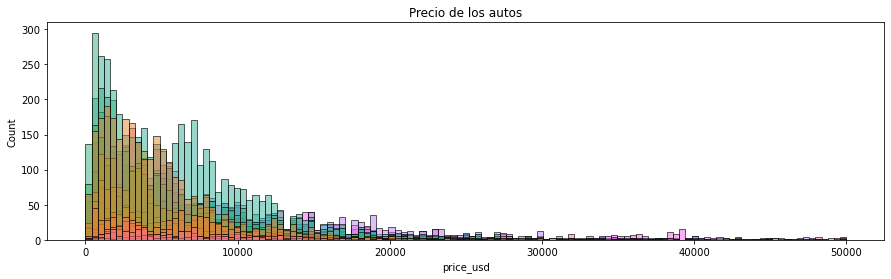

In [43]:
plt.figure(figsize=(15,4))
plt.title('Precio de los autos')
sns.histplot(data = df, x = df['price_usd'], hue=df['manufacturer_name'], legend=False)
plt.show()

**Tangente hiperbolica**

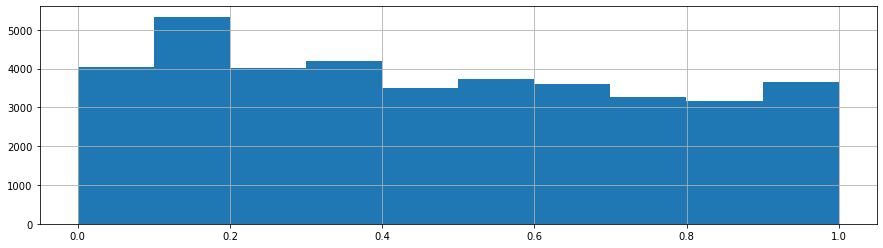

In [35]:
p = 10000

plt.figure(figsize=(15,4))
df['price_usd'].apply(lambda x: np.tanh(x/p)).hist()
plt.show()

### Datos Categóricos